In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_peatones = pd.read_csv(r'C:\Users\ivan_pinar\Dropbox\Creación de MOCs\MOC Master Python Análisis de Datos\Datasets\8.12\PEATONES_2020_mod.csv',encoding = "ISO-8859-1",delimiter=';')

In [3]:
df_peatones.head()

,FECHA,HORA,IDENTIFICADOR,PEATONES,NÚMERO_DISTRITO,DISTRITO,NOMBRE_VIAL,NÚMERO,CÓDIGO_POSTAL,OBSERVACIONES_DIRECCION,LATITUD,LONGITUD
0,01/01/2020,0:00:00,PERM_PEA02_PM01,497.0,1.0,Centro,Calle Fuencarral,22.0,28004.0,Calle peatonal Datos en prueba,"40,4220090","-3,7008917"
1,01/01/2020,0:15:00,PERM_PEA02_PM01,244.0,1.0,Centro,Calle Fuencarral,22.0,28004.0,Calle peatonal Datos en prueba,"40,4220090","-3,7008917"
2,01/01/2020,0:30:00,PERM_PEA02_PM01,179.0,1.0,Centro,Calle Fuencarral,22.0,28004.0,Calle peatonal Datos en prueba,"40,4220090","-3,7008917"
3,01/01/2020,0:45:00,PERM_PEA02_PM01,174.0,1.0,Centro,Calle Fuencarral,22.0,28004.0,Calle peatonal Datos en prueba,"40,4220090","-3,7008917"
4,01/01/2020,1:00:00,PERM_PEA02_PM01,131.0,1.0,Centro,Calle Fuencarral,22.0,28004.0,Calle peatonal Datos en prueba,"40,4220090","-3,7008917"


In [4]:
df_peatones.dropna(inplace=True)

In [5]:
df_peatones["LATITUD"]=df_peatones["LATITUD"].astype(str).apply(lambda x:x.replace(",","."))
df_peatones["LATITUD"]=pd.to_numeric(df_peatones["LATITUD"])
df_peatones["LONGITUD"]=df_peatones["LONGITUD"].astype(str).apply(lambda x:x.replace(",","."))
df_peatones["LONGITUD"]=pd.to_numeric(df_peatones["LONGITUD"])

# Representación con basemap

In [6]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\ivan_pinar\AppData\Local\Continuum\anaconda3\Lib\site-packages\mpl_toolkits\basemap'

In [7]:
from mpl_toolkits.basemap import Basemap

In [8]:
lat = df_peatones['LATITUD'].values
lon = df_peatones['LONGITUD'].values
peatones = df_peatones['PEATONES'].values

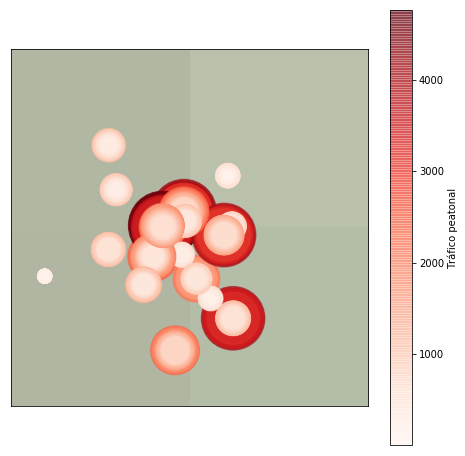

In [48]:
# 1. Dibujar el mapa base
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='f', 
            lat_0=40.42, lon_0=-3.7,
            width=0.5E4, height=0.5E4)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. Representar los datos indicando en c el color 
# de los puntos y en "s" el tamaño
m.scatter(lon, lat, latlon=True,
          c=peatones, s=peatones,
          cmap='Reds', alpha=0.5)

# 3. Crear leyenda
plt.colorbar(label="Tráfico peatonal")
plt.clim(peatones.min(),peatones.max())

# Representación con Google Maps

In [11]:
df_peatones_ene = df_peatones[df_peatones["FECHA"]=="01/01/2020"]

In [12]:
lat_ene = df_peatones_ene['LATITUD'].values
lon_ene = df_peatones_ene['LONGITUD'].values
peatones_ene = df_peatones_ene['PEATONES'].values

In [22]:
import gmplot 
# GoogleMapPlotter
gmap1 = gmplot.GoogleMapPlotter(40.42,-3.7, 13 )
gmap1.scatter(lat_ene,lon_ene, 'red', size = 30, marker = False )
gmap1.draw(r'C:\Users\ivan_pinar\Dropbox\Creación de MOCs\MOC Master Python Análisis de Datos\Datasets\8.12\mapa.html') 

In [23]:
import gmplot 
# GoogleMapPlotter
gmap1 = gmplot.GoogleMapPlotter(40.42,-3.7, 13 )
gmap1.heatmap(lat_ene,lon_ene)
gmap1.draw(r'C:\Users\ivan_pinar\Dropbox\Creación de MOCs\MOC Master Python Análisis de Datos\Datasets\8.12\mapa_heat.html') 